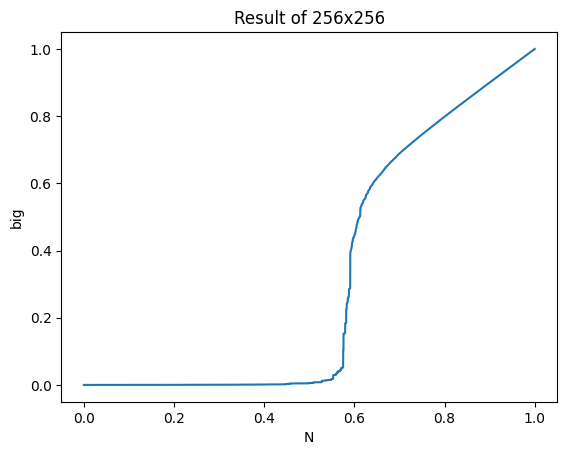

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

L = 256
N = L**2

K =  np.empty(N, dtype=int)
Kmax = 4    # 각 점의 최대 이웃 수
for i in range(N):
  K[i] = Kmax

# 각 점의 이웃을 저장할 배열 생성
nn = np.empty((N, Kmax), dtype=int)

# 각 점의 이웃 설정
for i in range(N):
  nn[i][0] = i-1+L*(i%L==0)    # left
  nn[i][1] = i+1-L*(i%L==L-1)  # right
  nn[i][2] = i-L+N*(i//L==0)   # up
  nn[i][3] = i+L-N*(i//L==L-1) # down

# 각 점의 parent를 저장할 배열 설정
ptr = np.full(N, -N-1)

# 특정 점의 root를 찾는 함수 정의
def find(i):
  if ptr[i] < 0:
    return i
  else:
    ptr[i] = find(ptr[i]) # root를 parent로 지정
    return ptr[i]

# 두 개의 트리를 합치는 함수 정의
def union(r1, r2, big):
  if r2 != r1:
    if ptr[r1] > ptr[r2]: # 두 번째 트리가 더 크면
      ptr[r2] += ptr[r1]  # 첫 번째 트리를 병합
      ptr[r1] = r2
      r1 = r2
    else:                 # 아니면 반대로
      ptr[r1] += ptr[r2]
      ptr[r2] = r1
    if -ptr[r1] > big:    # 기존의 big보다 크면 갱신
      big = -ptr[r1]
  return r1, r2, big

# 점을 채워 나갈 순서를 결정
order =  np.empty(N, dtype=int)
for i in range(N):
  order[i] = i
random.shuffle(order)

# 모든 점을 처음엔 빈 칸으로 설정
for i in range(N):
  ptr[i] = -N-1

big = 0
N_list = []
big_list = []

# 점을 하나씩 추가하며 합침
for i in range(N):
  r1, s1 = order[i], order[i]  # 위의 order를 따라 점 추가
  ptr[s1] = -1                 # 그 크기는 1

  # 각 점의 이웃들에 대해
  for j in range(Kmax):
    s2 = nn[s1, j]
    if ptr[s2] != -N-1:        # 비어 있지 않으면
      r2 = find(s2)            # 작은 쪽을 합친다
      r1, r2, big = union(r1, r2, big)
  N_list.append((i+1)/N)
  big_list.append(big/N)

# 결과를 그래프로 표시
plt.plot(N_list, big_list)
plt.title(f'Result of {L}x{L}')
plt.xlabel('N')
plt.ylabel('big')
plt.show()